### Week 4: Machine Learning and Data Mining

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.classifier import OneRClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [142]:
pd.set_option('display.max_colwidth',None)
titanic = pd.read_csv('./titanic.csv')
print("Number of samples in original data: {}\n".format(len(titanic.index)))

columns = titanic.columns
print("Features present in dataset: \n", columns)

titanic.loc[titanic['Sex'] == 'male', 'Sex']=1
titanic.loc[titanic['Sex'] == 'female', 'Sex']=0
print(titanic.head(5))

Number of samples in original data: 887

Features present in dataset: 
 Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')
   Survived  Pclass                                                Name Sex  \
0         0       3                              Mr. Owen Harris Braund   1   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cumings   0   
2         1       3                               Miss. Laina Heikkinen   0   
3         1       1         Mrs. Jacques Heath (Lily May Peel) Futrelle   0   
4         0       3                             Mr. William Henry Allen   1   

    Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0  22.0                        1                        0   7.2500  
1  38.0                        1                        0  71.2833  
2  26.0                        0                        0   7.9250  
3  35.0                        1  

### Problem 1:

### Q1. Selecting two features that have the most significant correlation to the target feature, Survived from correlation visualization

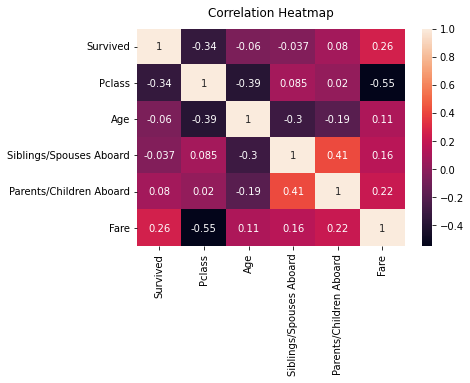

In [103]:
heat_map = sns.heatmap(titanic.corr(), annot=True);
heat_map.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [104]:
Selecting_features = titanic[['Survived', 'Pclass', 'Fare']]
Selecting_features.head(5)

,Survived,Pclass,Fare
0,0,3,7.2500
1,1,1,71.2833
2,1,3,7.9250
3,1,1,53.1000
4,0,3,8.0500


### Q2. Using Naive Bayes classifier and the most two significant features to predict the Survival of the travellers.

In [105]:
clf = GaussianNB()
le = preprocessing.LabelEncoder()

x = titanic[["Pclass", "Fare"]]
y = le.fit(titanic["Survived"])
y = le.transform(titanic["Survived"])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
print("x training samples: {}".format(x_train.shape))
print("x test samples: {}".format(x_test.shape))
print("y training samples: {}".format(y_train.shape))
print("y test samples: {}".format(y_test.shape))

x training samples: (665, 2)
x test samples: (222, 2)
y training samples: (665,)
y test samples: (222,)


In [106]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accu = 100*np.mean(y_pred ==y_test)
print("Accuracy: ",accu)
print("\n confusion_matrix: \n", confusion_matrix(y_test, y_pred))

Accuracy:  68.01801801801803

 confusion_matrix: 
 [[119  18]
 [ 53  32]]


### Q3. Comparing the performance of titanic model when using all the attributes of the travellers.

In [107]:
xd = titanic[["Pclass","Sex","Age","Siblings/Spouses Aboard","Parents/Children Aboard","Fare"]]
yd = le.fit(titanic["Survived"])
yd = le.transform(titanic["Survived"])

xd_train, xd_test, yd_train, yd_test = train_test_split(xd, yd, test_size = 0.25)
print("No of training samples: {}".format(xd_train.shape))
print("No of test samples: {}".format(xd_test.shape))
print("y training samples: {}".format(yd_train.shape))
print("y test samples: {}".format(yd_test.shape))

No of training samples: (665, 6)
No of test samples: (222, 6)
y training samples: (665,)
y test samples: (222,)


In [108]:
clf.fit(xd_train, yd_train)
yd_pred = clf.predict(xd_test)
acc = accuracy_score(yd_test, yd_pred)

print("Accuracy_score :", 100 * acc)
print("\n confusion_matrix: \n", confusion_matrix(yd_test, yd_pred))

Accuracy_score : 80.18018018018019

 confusion_matrix: 
 [[123  19]
 [ 25  55]]


### Problem 2:

#### Loading and Calculating dailt returns

In [126]:
# Loading IBM data

df = pd.read_csv('./IBM.txt', delimiter = " ")
df_raw = df
print("Number of rows in original data: {}".format(len(df.index)))
print("Features: ", df.columns)
df.head(5)

Number of rows in original data: 3692
Features:  Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adjusted'], dtype='object')


,Date,Open,High,Low,Close,Volume,Adjusted
0,2007-01-03,97.180000,98.400002,96.260002,97.269997,9196800,63.127567
1,2007-01-04,97.250000,98.790001,96.879997,98.309998,10524500,63.802544
2,2007-01-05,97.599998,97.949997,96.910004,97.419998,7221300,63.224930
3,2007-01-08,98.500000,99.500000,98.349998,98.900002,10340000,64.185463
4,2007-01-09,99.080002,100.330002,99.070000,100.070000,11108200,64.944771


In [127]:
# Calculate daily returns using previous day's close price

df['Daily_returns'] = 100*((df['Close'] - df['Close'].shift())/ df['Close'].shift())
conditions = [(df['Daily_returns'] >= 0.0),(df['Daily_returns'] < 0.0)] 
values = ['Up', 'Down']
df['Decision'] = np.select(conditions, values)

# remove the first row, since it is not possible to calculate daily return
df_new = df[1:]
print("Number of rows in processed data: {}".format(len(df_new.index)))
df_new.head(8)

Number of rows in processed data: 3691


,Date,Open,High,Low,Close,Volume,Adjusted,Daily_returns,Decision
1,2007-01-04,97.250000,98.790001,96.879997,98.309998,10524500,63.802544,1.069190,Up
2,2007-01-05,97.599998,97.949997,96.910004,97.419998,7221300,63.224930,-0.905300,Down
3,2007-01-08,98.500000,99.500000,98.349998,98.900002,10340000,64.185463,1.519199,Up
4,2007-01-09,99.080002,100.330002,99.070000,100.070000,11108200,64.944771,1.183011,Up
5,2007-01-10,98.500000,99.050003,97.930000,98.889999,8744800,64.178978,-1.179176,Down
6,2007-01-11,99.000000,99.900002,98.500000,98.650002,8000700,64.023201,-0.242691,Down
7,2007-01-12,98.989998,99.690002,98.500000,99.339996,6636500,64.471024,0.699436,Up
8,2007-01-16,99.400002,100.839996,99.300003,100.820000,9602200,65.431503,1.489837,Up


#### Generating a correlation visualization of Volume

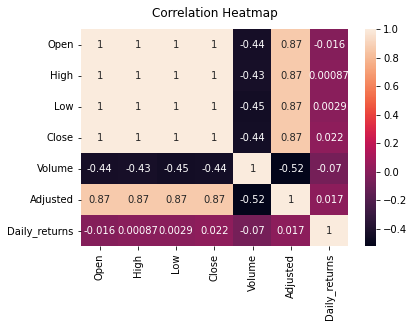

In [128]:
heat_map_IBM = sns.heatmap(df_new.corr(), annot=True);
heat_map_IBM.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### Q1. select the two features that have the most significant correlation to the target feature, daily return.

In [129]:

Selecting_features_IBM = df_new[['Daily_returns', 'Adjusted', 'Volume']]
print(df_new.head(5))
Selecting_features_IBM.head(5)

         Date       Open        High        Low       Close    Volume  \
1  2007-01-04  97.250000   98.790001  96.879997   98.309998  10524500   
2  2007-01-05  97.599998   97.949997  96.910004   97.419998   7221300   
3  2007-01-08  98.500000   99.500000  98.349998   98.900002  10340000   
4  2007-01-09  99.080002  100.330002  99.070000  100.070000  11108200   
5  2007-01-10  98.500000   99.050003  97.930000   98.889999   8744800   

    Adjusted  Daily_returns Decision  
1  63.802544       1.069190       Up  
2  63.224930      -0.905300     Down  
3  64.185463       1.519199       Up  
4  64.944771       1.183011       Up  
5  64.178978      -1.179176     Down  


,Daily_returns,Adjusted,Volume
1,1.069190,63.802544,10524500
2,-0.905300,63.224930,7221300
3,1.519199,64.185463,10340000
4,1.183011,64.944771,11108200
5,-1.179176,64.178978,8744800


#### Generating a correlation visualization of the moving average (with a period of 5, 10, 20, 50 or 200).
 

In [137]:
df_raw = pd.read_csv('./IBM.txt', delimiter = " ")

for i in [5,10, 20, 50,200]:
    df_raw['MA_{}'.format(i)] = df_raw['Close'].rolling(window=i).mean()

In [138]:
df_raw.head(20)

,Date,Open,High,Low,Close,Volume,Adjusted,MA_5,MA_10,MA_20,MA_50,MA_200
0,2007-01-03,97.180000,98.400002,96.260002,97.269997,9196800,63.127567,NaN,NaN,NaN,NaN,NaN
1,2007-01-04,97.250000,98.790001,96.879997,98.309998,10524500,63.802544,NaN,NaN,NaN,NaN,NaN
2,2007-01-05,97.599998,97.949997,96.910004,97.419998,7221300,63.224930,NaN,NaN,NaN,NaN,NaN
3,2007-01-08,98.500000,99.500000,98.349998,98.900002,10340000,64.185463,NaN,NaN,NaN,NaN,NaN
4,2007-01-09,99.080002,100.330002,99.070000,100.070000,11108200,64.944771,98.393999,NaN,NaN,NaN,NaN
5,2007-01-10,98.500000,99.050003,97.930000,98.889999,8744800,64.178978,98.717999,NaN,NaN,NaN,NaN
6,2007-01-11,99.000000,99.900002,98.500000,98.650002,8000700,64.023201,98.786000,NaN,NaN,NaN,NaN
7,2007-01-12,98.989998,99.690002,98.500000,99.339996,6636500,64.471024,99.170000,NaN,NaN,NaN,NaN
8,2007-01-16,99.400002,100.839996,99.300003,100.820000,9602200,65.431503,99.553999,NaN,NaN,NaN,NaN
9,2007-01-17,100.690002,100.900002,99.900002,100.019997,8200700,64.912323,99.543999,98.968999,NaN,NaN,NaN


********* Performing experiment [0]/[5] with Moving average window size:5 *******
No of training samples with moving average 5 days : 3585
No of test samples  with moving average 5 days    : 100

Accuracy_score : 47.0

confusion_matrix: 

 [[ 2 49]
 [ 4 45]]
********* Performing experiment [1]/[5] with Moving average window size:10 *******
No of training samples with moving average 10 days : 3580
No of test samples  with moving average 10 days    : 100

Accuracy_score : 48.0

confusion_matrix: 

 [[ 1 49]
 [ 3 47]]
********* Performing experiment [2]/[5] with Moving average window size:20 *******
No of training samples with moving average 20 days : 3570
No of test samples  with moving average 20 days    : 100

Accuracy_score : 65.0

confusion_matrix: 

 [[ 2 33]
 [ 2 63]]
********* Performing experiment [3]/[5] with Moving average window size:50 *******
No of training samples with moving average 50 days : 3540
No of test samples  with moving average 50 days    : 100

Accuracy_score : 6

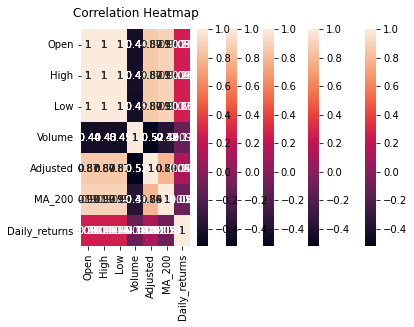

In [149]:
pd.set_option('mode.chained_assignment',None)

Windows = [5, 10, 20, 50, 200]
for i, Window in enumerate(Windows):
    
    print("********* Performing experiment [{}]/[{}] with Moving average window size:"
          "{} *******".format(i, len(Windows), Window))
    feat = 'MA_{}'.format(Window)
    df_new_MA = df_raw[["Open", "High", "Low",  "Volume", "Adjusted", feat]]
    df_new_MA['Daily_returns'] = 100*((df_new_MA[feat] - df_new_MA[feat].shift())/ df_new_MA[feat].shift())
    
    conditions = [(df_new_MA['Daily_returns'] >= 0.0),(df_new_MA['Daily_returns'] < 0.0)] 
    values = ['Up', 'Down']
    df_new_MA['Decision'] = np.select(conditions, values)
    
    df_new_MA.loc[df_new_MA['Decision'] == 'Up', 'Decision']=1
    df_new_MA.loc[df_new_MA['Decision'] == 'Down', 'Decision']=0
    
    heat_map_IBM_MA = sns.heatmap(df_new_MA.corr(), annot=True);
    heat_map_IBM_MA.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

    # remove the fews row, since it is not possible to calculate 
    # daily return with moving average of initial days
    df_new_MA = df_new_MA[Window:]
    df_new_MA.head(8)    
    le = preprocessing.LabelEncoder()
    decision_MA = le.fit(df_new_MA["Decision"].shift(-1))
    decision_MA = le.transform(df_new_MA["Decision"].shift(-1))
    #print(tabulate(df_new_MA.head(10), headers='keys', tablefmt='psql'))
    
    xd_train_IBM_MA =  df_new_MA[:-102]
    xd_test_IBM_MA  =  df_new_MA[-102:-2]

    yd_train_IBM_MA =  decision_MA[:-102]
    yd_test_IBM_MA  =  decision_MA[-102:-2]

    print("No of training samples with moving average {} days : {}".format(Window,len(xd_train_IBM_MA)))
    print("No of test samples  with moving average {} days    : {}\n".format(Window, len(xd_test_IBM_MA)))
    
    clf.fit(xd_train_IBM_MA, yd_train_IBM_MA)
    yd_pred_IBM_MA = clf.predict(xd_test_IBM_MA)
    acc = accuracy_score(yd_test_IBM_MA, yd_pred_IBM_MA)

    print("Accuracy_score :", 100 * acc)
    print("\nconfusion_matrix: \n\n", confusion_matrix(yd_test_IBM_MA, yd_pred_IBM_MA))


### Q2. Finding Naive Bayes classifier Using Naive Bayes classifier and the most two significant features predict daily return.

In [136]:
# predicting daily returns of 'NEXT DAY' using shift(-1) operation.

print("df_new shape", df_new.shape)

df_new_IBM = df_new.copy()

xd_IBM = df_new_IBM[[ "Volume", "Adjusted"]]
le = preprocessing.LabelEncoder()
decision = le.fit(df_new_IBM["Decision"].shift(-1))
decision = le.transform(df_new_IBM["Decision"].shift(-1))

print("Label for Returns of Next Day: ",decision[:10])
print("\nNext day returns are :\n ")
print("xtrain shape:", xd_IBM.shape)
print("shape", decision.shape)
df_new["Decision"].shift(-1).head(10)


df_new shape (3691, 9)
Label for Returns of Next Day:  [0 1 1 0 0 1 1 0 0 0]

Next day returns are :
 
xtrain shape: (3691, 2)
shape (3691,)


1     Down
2       Up
3       Up
4     Down
5     Down
6       Up
7       Up
8     Down
9     Down
10    Down
Name: Decision, dtype: object

In [134]:
# Split the IBM data into training and testing 

xd_train_IBM =  xd_IBM[:-102]
xd_test_IBM  =  xd_IBM[-102:-2]

yd_train_IBM =  decision[:-102]
yd_test_IBM  =  decision[-102:-2]

print("No of training samples : {}".format(xd_train_IBM.shape))
print("No of test samples     : {}\n".format(xd_test_IBM.shape))
print("y training samples : {}".format(yd_train_IBM.shape))
print("y test samples     : {}\n".format(yd_test_IBM.shape))
print("Training data:")
#xd_train_IBM.head()


No of training samples : (3589, 2)
No of test samples     : (100, 2)

y training samples : (3589,)
y test samples     : (100,)

Training data:


In [135]:
# Finding Gaussian Classifier

clf.fit(xd_train_IBM, yd_train_IBM)
yd_pred_IBM = clf.predict(xd_test_IBM)
acc = accuracy_score(yd_test_IBM, yd_pred_IBM)

print("Accuracy_score :", 100 * acc)
print("\n confusion_matrix: \n", confusion_matrix(yd_test_IBM, yd_pred_IBM))

Accuracy_score : 55.00000000000001

 confusion_matrix: 
 [[ 2 43]
 [ 2 53]]
